Dataset Overview:
Shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4 

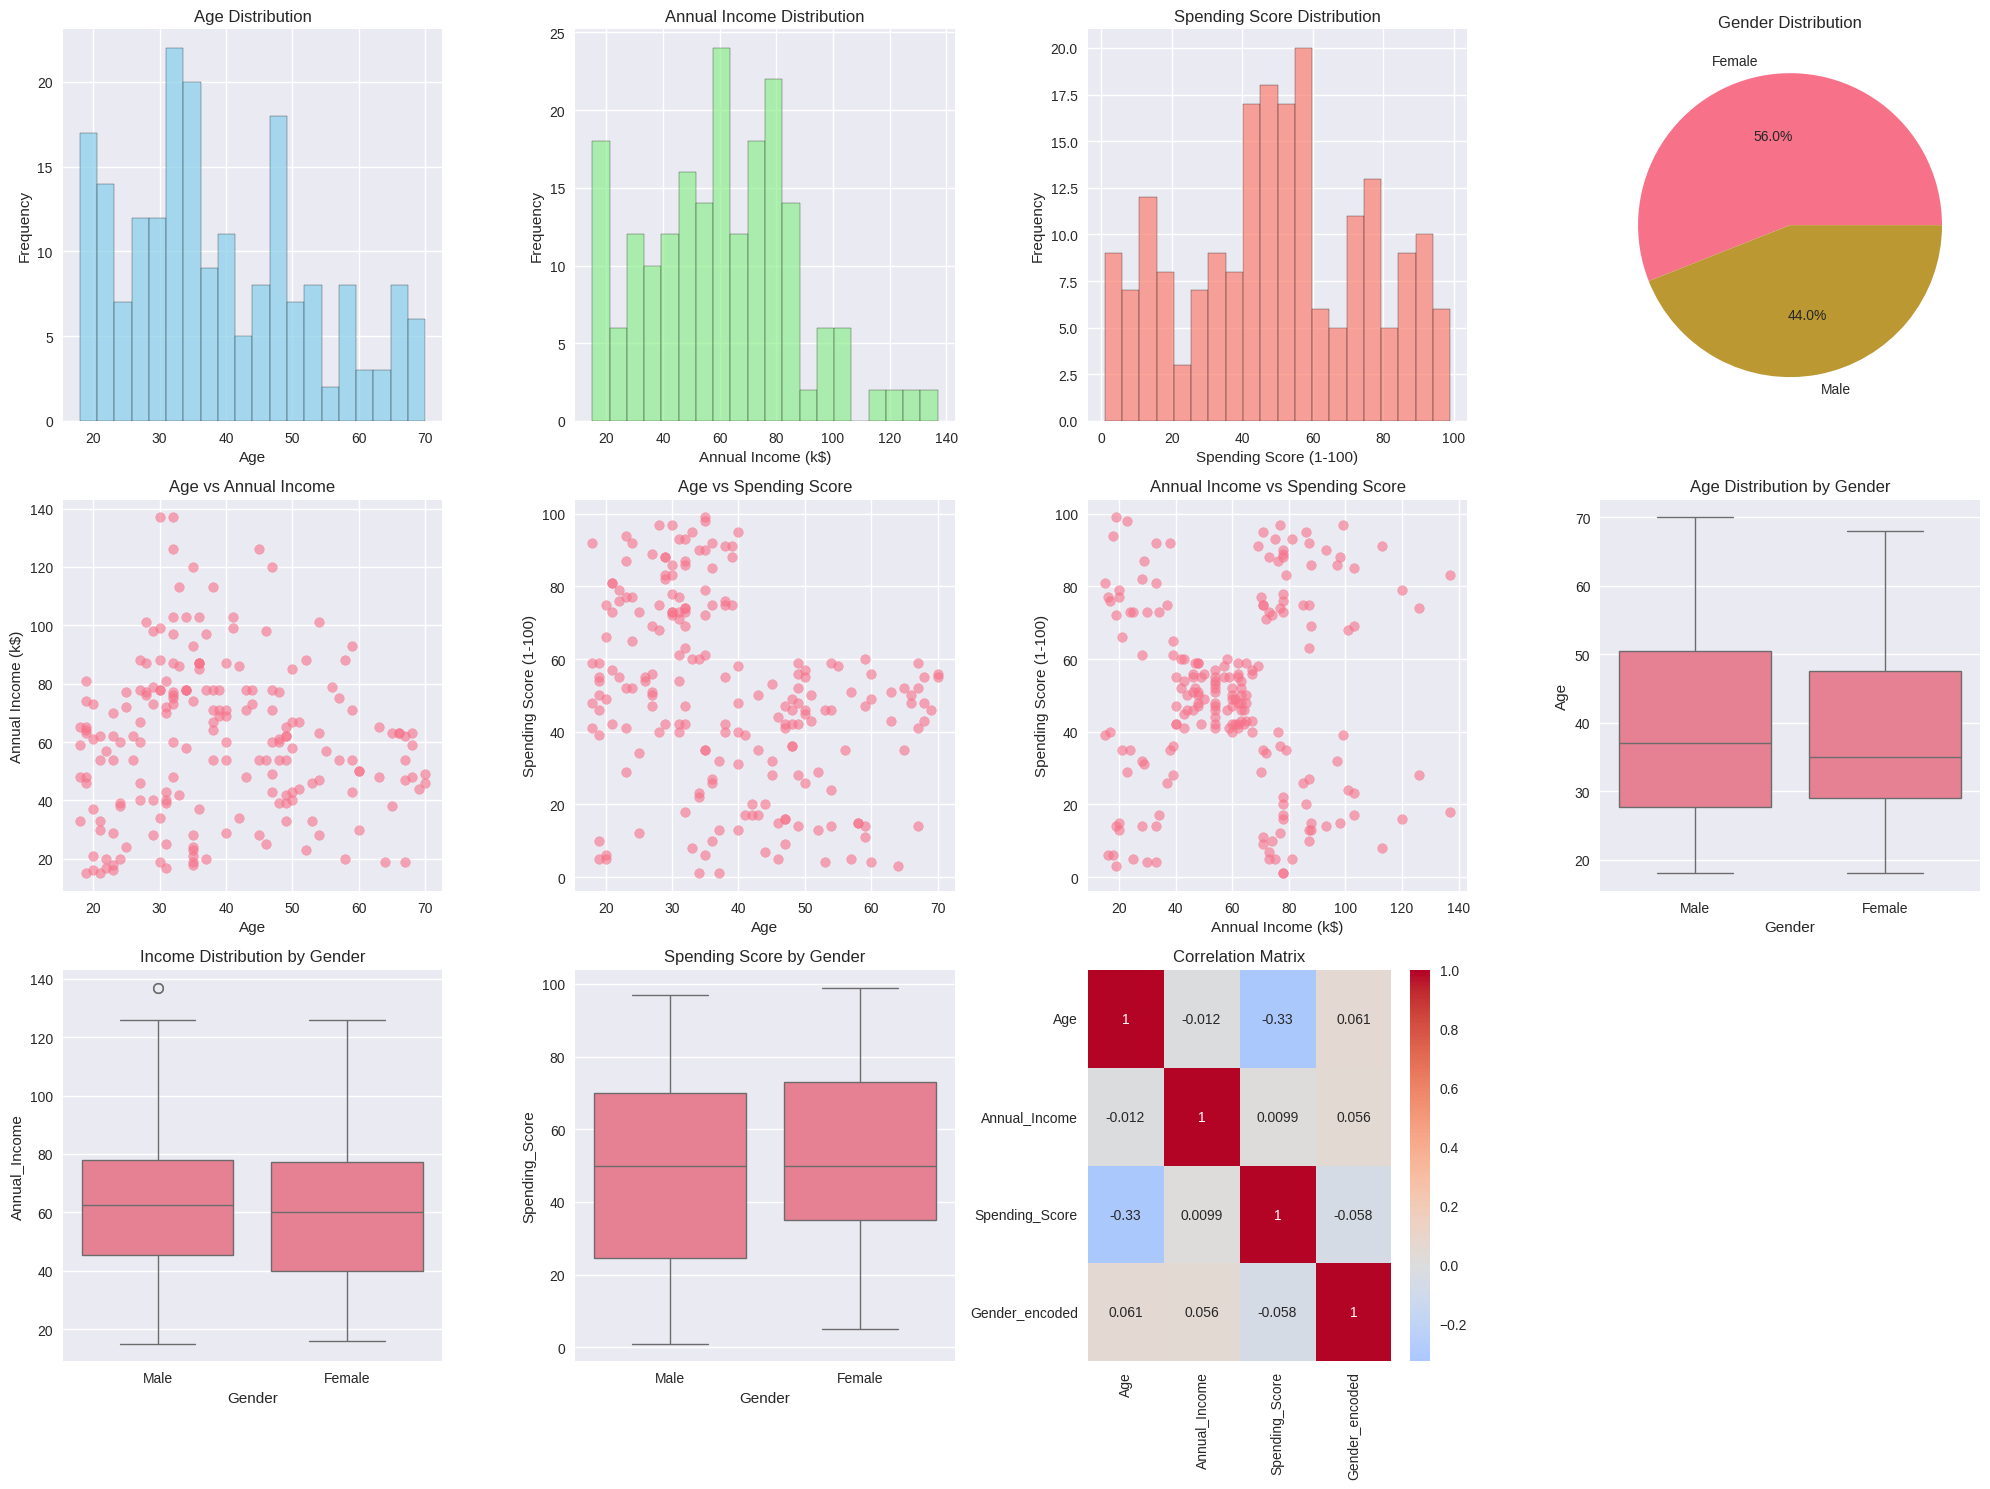


Preparing Data for Clustering...
Features for clustering: ['Age', 'Annual_Income', 'Spending_Score']
Feature matrix shape: (200, 3)
Original data shape: (200, 3)
Scaled data shape: (200, 3)
Scaler expects 3 features

Finding Optimal Number of Clusters...
Optimal K by Elbow method: 3
Optimal K by Silhouette score: 6
Using K = 5 for final clustering

Applying K-Means Clustering with K=5...
Cluster centers shape: (5, 3)
Scaler expects 3 features
Cluster Centers (Original Scale):
         Age  Annual_Income  Spending_Score  Cluster
0  46.250000      26.750000       18.350000        0
1  25.185185      41.092593       62.240741        1
2  32.875000      86.100000       81.525000        2
3  39.871795      86.102564       19.358974        3
4  55.638298      54.382979       48.851064        4

Cluster Analysis:
Cluster Summary Statistics:
           Age                Annual_Income                 Spending_Score  \
          mean    std min max          mean    std min  max           mean 

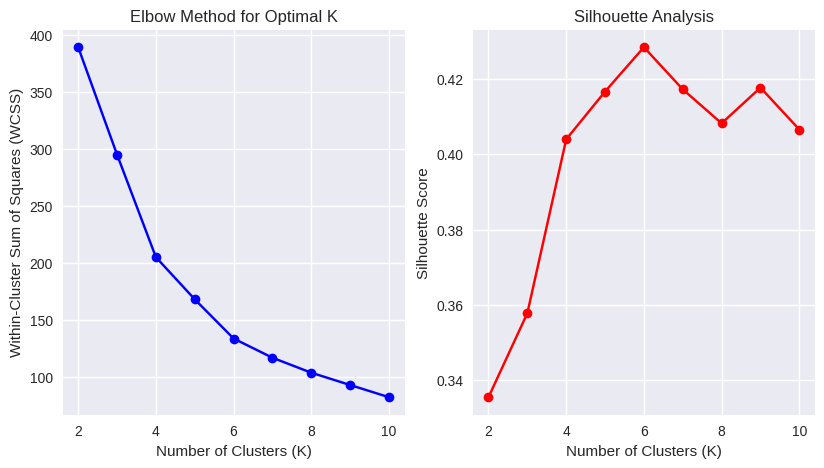

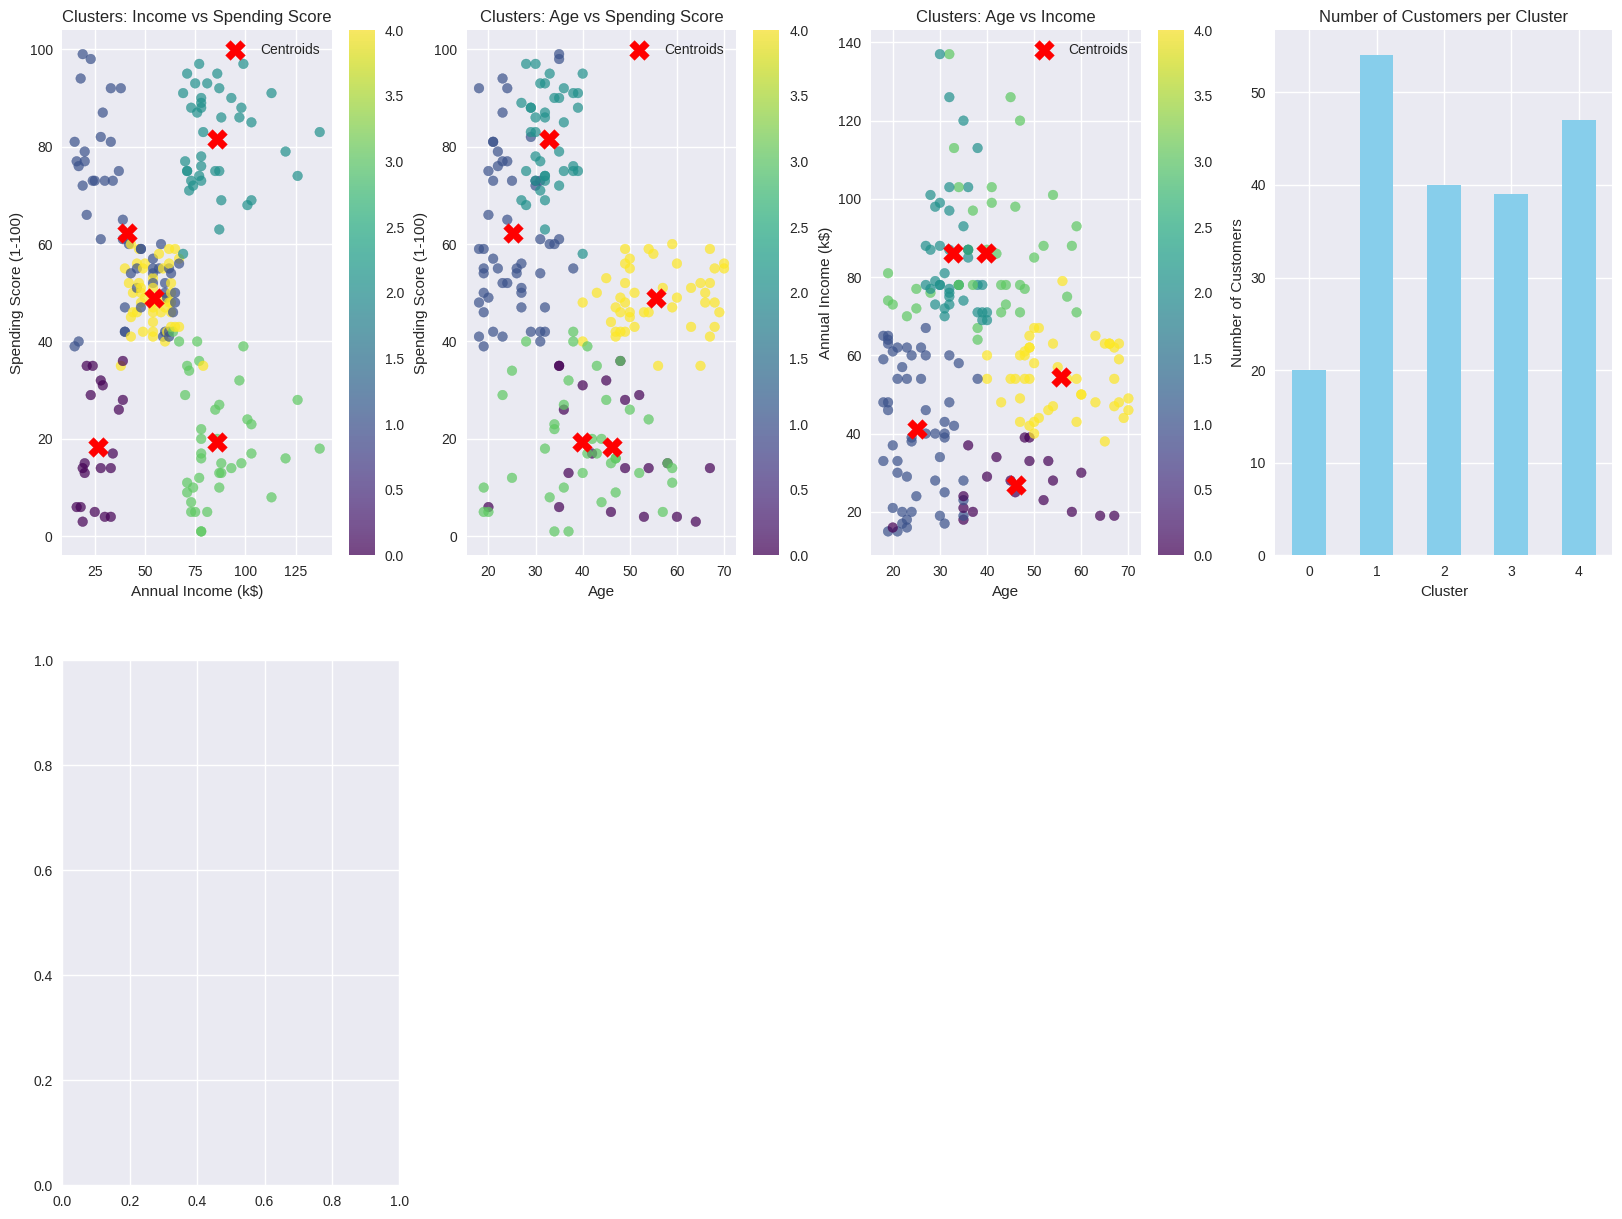

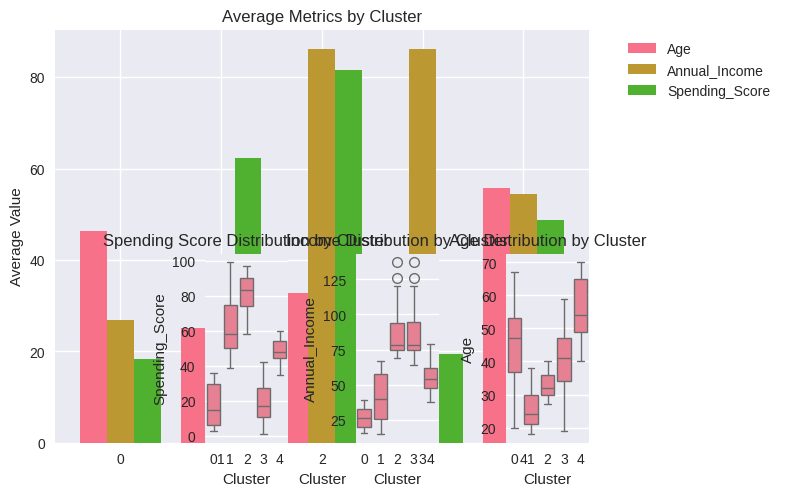

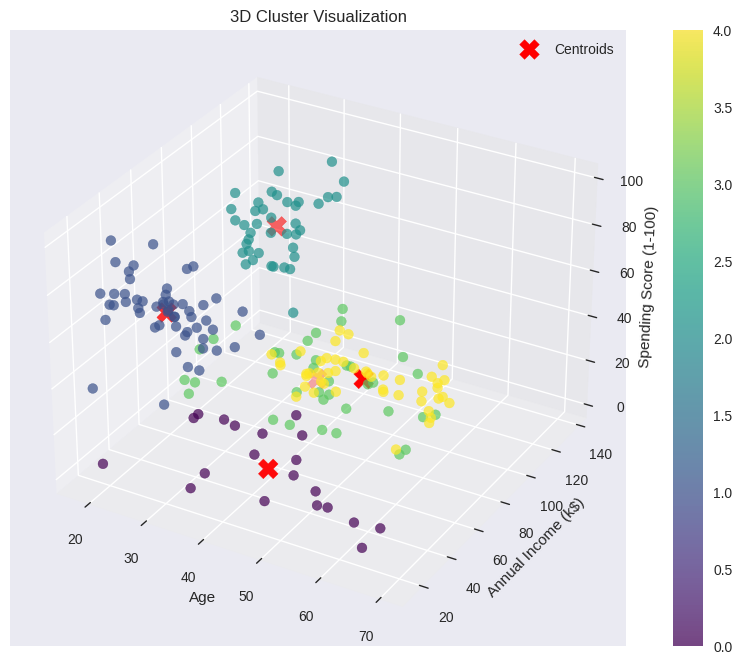


PCA Visualization...


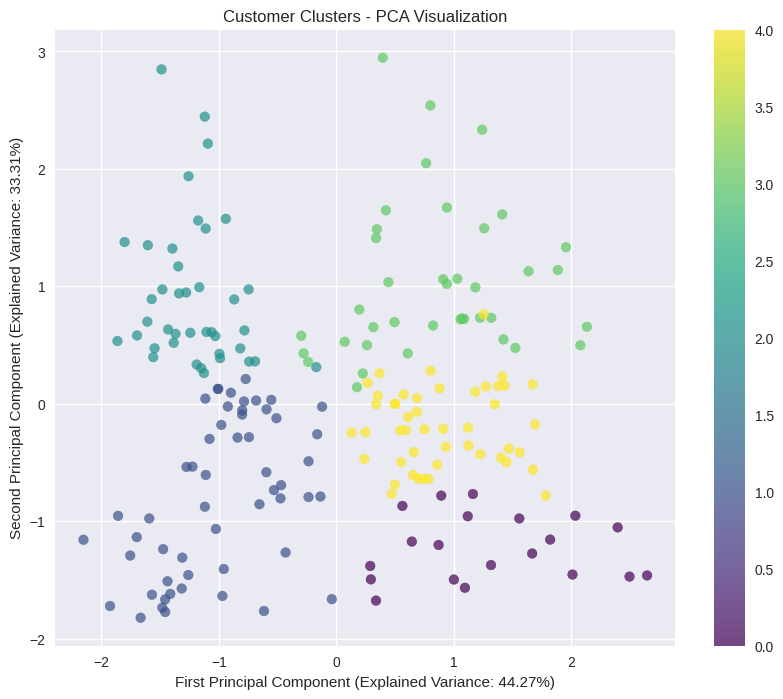

Total explained variance by first 2 components: 77.57%

Model Evaluation:
Silhouette Score: 0.417
Within-cluster sum of squares (Inertia): 168.25

Business Insights and Recommendations:

Cluster 0 Strategy:
  Standard customers with moderate income and spending. Focus on retention strategies.

Cluster 1 Strategy:
  High-income but low-spending customers. Target with premium products and exclusive offers.

Cluster 2 Strategy:
  High-value customers with high income and spending. VIP treatment and loyalty programs.

Cluster 3 Strategy:
  Budget-conscious customers. Offer discounts, promotions, and value products.

Cluster 4 Strategy:
  Young spenders with lower income but high spending tendency. Credit options and trendy products.

Example Customer Predictions:
Customer 1: Age 25, Income $40k, Spending 80
  Predicted Cluster: 1
  Strategy: High-income but low-spending customers. Target with premium products and exclusive offers.

Customer 2: Age 45, Income $80k, Spending 30
  Predicted C

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
# Replace 'Mall_Customers.csv' with your actual file path
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

print("Dataset Overview:")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDataset Statistics:")
print(df.describe())

# Check unique values for categorical columns
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# Data preprocessing
print("\nData Preprocessing...")
print("="*50)

# Handle gender encoding
if 'Gender' in df.columns:
    df['Gender_encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})
    print("Gender encoded: Male=1, Female=0")

# Rename columns for easier handling (if needed)
column_mapping = {
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}

for old_name, new_name in column_mapping.items():
    if old_name in df.columns:
        df[new_name] = df[old_name]

# Check if standard column names exist, otherwise use original names
income_col = 'Annual_Income' if 'Annual_Income' in df.columns else 'Annual Income (k$)'
spending_col = 'Spending_Score' if 'Spending_Score' in df.columns else 'Spending Score (1-100)'

print(f"Using columns: Age, {income_col}, {spending_col}")

# Data Visualization
print("\nExploratory Data Analysis...")
print("="*50)

plt.figure(figsize=(20, 15))

# 1. Age distribution
plt.subplot(3, 4, 1)
plt.hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Annual Income distribution
plt.subplot(3, 4, 2)
plt.hist(df[income_col], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# 3. Spending Score distribution
plt.subplot(3, 4, 3)
plt.hist(df[spending_col], bins=20, alpha=0.7, color='salmon', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

# 4. Gender distribution
if 'Gender' in df.columns:
    plt.subplot(3, 4, 4)
    gender_counts = df['Gender'].value_counts()
    plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
    plt.title('Gender Distribution')

# 5. Age vs Annual Income
plt.subplot(3, 4, 5)
plt.scatter(df['Age'], df[income_col], alpha=0.6)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# 6. Age vs Spending Score
plt.subplot(3, 4, 6)
plt.scatter(df['Age'], df[spending_col], alpha=0.6)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# 7. Annual Income vs Spending Score
plt.subplot(3, 4, 7)
plt.scatter(df[income_col], df[spending_col], alpha=0.6)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# 8. Box plot for Age by Gender
if 'Gender' in df.columns:
    plt.subplot(3, 4, 8)
    sns.boxplot(data=df, x='Gender', y='Age')
    plt.title('Age Distribution by Gender')

# 9. Box plot for Income by Gender
if 'Gender' in df.columns:
    plt.subplot(3, 4, 9)
    sns.boxplot(data=df, x='Gender', y=income_col)
    plt.title('Income Distribution by Gender')

# 10. Box plot for Spending Score by Gender
if 'Gender' in df.columns:
    plt.subplot(3, 4, 10)
    sns.boxplot(data=df, x='Gender', y=spending_col)
    plt.title('Spending Score by Gender')

# 11. Correlation heatmap
plt.subplot(3, 4, 11)
numeric_cols = ['Age', income_col, spending_col]
if 'Gender_encoded' in df.columns:
    numeric_cols.append('Gender_encoded')
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Prepare data for clustering
print("\nPreparing Data for Clustering...")
print("="*50)

# Select features for clustering
# We'll use different combinations for different analyses
features_basic = ['Age', income_col, spending_col]

# Ensure all features exist in the dataframe
available_features = [col for col in features_basic if col in df.columns]
if len(available_features) != len(features_basic):
    print(f"Warning: Some features not found. Using available features: {available_features}")
    features_basic = available_features

# Create feature matrix
X_basic = df[features_basic].copy()

print(f"Features for clustering: {features_basic}")
print(f"Feature matrix shape: {X_basic.shape}")

# Check for any missing values and handle them
if X_basic.isnull().any().any():
    print("Warning: Found missing values. Filling with median values.")
    X_basic = X_basic.fillna(X_basic.median())

# Standardize the features
scaler = StandardScaler()
X_basic_scaled = scaler.fit_transform(X_basic)

print(f"Original data shape: {X_basic.shape}")
print(f"Scaled data shape: {X_basic_scaled.shape}")
print(f"Scaler expects {len(features_basic)} features")

# Find optimal number of clusters using Elbow Method
print("\nFinding Optimal Number of Clusters...")
print("="*50)

def find_optimal_clusters(X, max_k=10):
    """Find optimal number of clusters using Elbow method and Silhouette analysis"""
    inertias = []
    silhouette_scores = []
    K_range = range(2, max_k + 1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    return K_range, inertias, silhouette_scores

# Find optimal clusters for basic features
K_range, inertias, silhouette_scores = find_optimal_clusters(X_basic_scaled)

# Plot Elbow curve and Silhouette scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Calculate elbow point
def find_elbow_point(inertias):
    """Find elbow point using the rate of change method"""
    deltas = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
    delta_deltas = [deltas[i] - deltas[i+1] for i in range(len(deltas)-1)]
    elbow_idx = delta_deltas.index(max(delta_deltas)) + 2  # +2 because we start from k=2
    return elbow_idx

optimal_k_elbow = find_elbow_point(inertias)
optimal_k_silhouette = K_range[silhouette_scores.index(max(silhouette_scores))]

print(f"Optimal K by Elbow method: {optimal_k_elbow}")
print(f"Optimal K by Silhouette score: {optimal_k_silhouette}")

# Let's use the most common optimal k (usually 5 for this dataset)
optimal_k = 5
print(f"Using K = {optimal_k} for final clustering")

# Apply K-Means clustering
print(f"\nApplying K-Means Clustering with K={optimal_k}...")
print("="*50)

# Make sure we're using the same scaler that was fitted earlier
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_basic_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Calculate cluster centers (in original scale)
# Make sure the scaler and cluster centers have the same dimensions
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
print(f"Scaler expects {len(features_basic)} features")

try:
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    centers_df = pd.DataFrame(cluster_centers, columns=features_basic)
    centers_df['Cluster'] = range(optimal_k)

    print("Cluster Centers (Original Scale):")
    print(centers_df)
except Exception as e:
    print(f"Error in inverse transform: {e}")
    print("Creating cluster centers manually...")

    # Manual calculation of cluster centers
    centers_list = []
    for i in range(optimal_k):
        cluster_data = df[df['Cluster'] == i][features_basic]
        center = cluster_data.mean()
        centers_list.append(center)

    centers_df = pd.DataFrame(centers_list)
    centers_df['Cluster'] = range(optimal_k)

    print("Cluster Centers (Original Scale):")
    print(centers_df)

# Analyze clusters
print("\nCluster Analysis:")
print("="*50)

cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    income_col: ['mean', 'std', 'min', 'max'],
    spending_col: ['mean', 'std', 'min', 'max']
}).round(2)

print("Cluster Summary Statistics:")
print(cluster_summary)

# Count of customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print(f"\nCustomers per cluster:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

# Cluster characteristics
print("\nCluster Characteristics:")
print("="*50)

cluster_names = {
    0: "Standard Customers",
    1: "High Income, Low Spending",
    2: "High Income, High Spending",
    3: "Low Income, Low Spending",
    4: "Low Income, High Spending"
}

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data[income_col].mean()
    avg_spending = cluster_data[spending_col].mean()

    print(f"\nCluster {cluster}:")
    print(f"  Size: {len(cluster_data)} customers")
    print(f"  Average Age: {avg_age:.1f} years")
    print(f"  Average Income: ${avg_income:.1f}k")
    print(f"  Average Spending Score: {avg_spending:.1f}/100")

    if cluster in cluster_names:
        print(f"  Profile: {cluster_names[cluster]}")

# Visualize clusters
print("\nVisualizing Clusters...")
print("="*50)

plt.figure(figsize=(20, 15))

# 1. 2D scatter plot: Income vs Spending Score
plt.subplot(2, 4, 1)
scatter = plt.scatter(df[income_col], df[spending_col], c=df['Cluster'], cmap='viridis', alpha=0.7)
# Plot centroids if available
if 'centers_df' in locals():
    plt.scatter(centers_df[income_col], centers_df[spending_col], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.legend()

# 2. 2D scatter plot: Age vs Spending Score
plt.subplot(2, 4, 2)
scatter = plt.scatter(df['Age'], df[spending_col], c=df['Cluster'], cmap='viridis', alpha=0.7)
if 'centers_df' in locals():
    plt.scatter(centers_df['Age'], centers_df[spending_col], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.legend()

# 3. 2D scatter plot: Age vs Income
plt.subplot(2, 4, 3)
scatter = plt.scatter(df['Age'], df[income_col], c=df['Cluster'], cmap='viridis', alpha=0.7)
if 'centers_df' in locals():
    plt.scatter(centers_df['Age'], centers_df[income_col], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(scatter)
plt.legend()

# 4. Cluster size distribution
plt.subplot(2, 4, 4)
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# 5. Average metrics by cluster
plt.subplot(2, 4, 5)
cluster_avg = df.groupby('Cluster')[['Age', income_col, spending_col]].mean()
cluster_avg.plot(kind='bar', width=0.8)
plt.title('Average Metrics by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# 6. Box plot for spending score by cluster
plt.subplot(2, 4, 6)
sns.boxplot(data=df, x='Cluster', y=spending_col)
plt.title('Spending Score Distribution by Cluster')

# 7. Box plot for income by cluster
plt.subplot(2, 4, 7)
sns.boxplot(data=df, x='Cluster', y=income_col)
plt.title('Income Distribution by Cluster')

# 8. Box plot for age by cluster
plt.subplot(2, 4, 8)
sns.boxplot(data=df, x='Cluster', y='Age')
plt.title('Age Distribution by Cluster')

plt.tight_layout()
plt.show()

# 3D visualization if possible
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df[income_col], df[spending_col],
                   c=df['Cluster'], cmap='viridis', alpha=0.7, s=50)

# Plot centroids if available
if 'centers_df' in locals():
    ax.scatter(centers_df['Age'], centers_df[income_col], centers_df[spending_col],
              c='red', marker='X', s=200, label='Centroids')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Cluster Visualization')
plt.colorbar(scatter)
plt.legend()
plt.show()

# PCA visualization
print("\nPCA Visualization...")
print("="*50)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_basic_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Clusters - PCA Visualization')
plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.colorbar(scatter)
plt.show()

print(f"Total explained variance by first 2 components: {sum(pca.explained_variance_ratio_):.2%}")

# Model evaluation
print("\nModel Evaluation:")
print("="*50)

silhouette_avg = silhouette_score(X_basic_scaled, cluster_labels)
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Within-cluster sum of squares (Inertia): {inertia:.2f}")

# Business insights
print("\nBusiness Insights and Recommendations:")
print("="*50)

insights = {
    0: "Standard customers with moderate income and spending. Focus on retention strategies.",
    1: "High-income but low-spending customers. Target with premium products and exclusive offers.",
    2: "High-value customers with high income and spending. VIP treatment and loyalty programs.",
    3: "Budget-conscious customers. Offer discounts, promotions, and value products.",
    4: "Young spenders with lower income but high spending tendency. Credit options and trendy products."
}

for cluster in range(optimal_k):
    if cluster in insights:
        print(f"\nCluster {cluster} Strategy:")
        print(f"  {insights[cluster]}")

# Function to predict cluster for new customers
def predict_customer_cluster(age, income, spending_score):
    """
    Predict cluster for a new customer

    Parameters:
    age: Customer's age
    income: Annual income in thousands
    spending_score: Spending score (1-100)
    """
    # Create input array
    new_customer = np.array([[age, income, spending_score]])

    # Scale the features
    new_customer_scaled = scaler.transform(new_customer)

    # Predict cluster
    predicted_cluster = kmeans.predict(new_customer_scaled)[0]

    return predicted_cluster

# Example predictions
print("\nExample Customer Predictions:")
print("="*50)

example_customers = [
    (25, 40, 80),   # Young, moderate income, high spending
    (45, 80, 30),   # Middle-aged, high income, low spending
    (35, 60, 70),   # Middle-aged, good income, high spending
    (50, 30, 20),   # Older, low income, low spending
]

for i, (age, income, spending) in enumerate(example_customers):
    cluster = predict_customer_cluster(age, income, spending)
    print(f"Customer {i+1}: Age {age}, Income ${income}k, Spending {spending}")
    print(f"  Predicted Cluster: {cluster}")
    if cluster in insights:
        print(f"  Strategy: {insights[cluster]}")
    print()

# Save results
print("\nSaving Results...")
print("="*50)

# Save the clustered dataset
df.to_csv('customer_segments.csv', index=False)
print("Clustered dataset saved as 'customer_segments.csv'")

# Save cluster centers
centers_df.to_csv('cluster_centers.csv', index=False)
print("Cluster centers saved as 'cluster_centers.csv'")

print("\nCustomer Segmentation Analysis Complete!")
print("="*50)

# Summary
print("\nSUMMARY:")
print(f"• Created {optimal_k} customer segments using K-Means clustering")
print(f"• Analyzed {len(df)} customers based on age, income, and spending behavior")
print(f"• Achieved silhouette score of {silhouette_avg:.3f} (higher is better)")
print(f"• Identified distinct customer profiles for targeted marketing strategies")
print("• Generated actionable business insights for each customer segment")